# Salary Prediction Using Linear Regression

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

### loading the dataset

In [2]:
df = pd.read_csv('salary_data.csv')

### Finding general information about the dataset

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Visualizing the dataset before linear regression

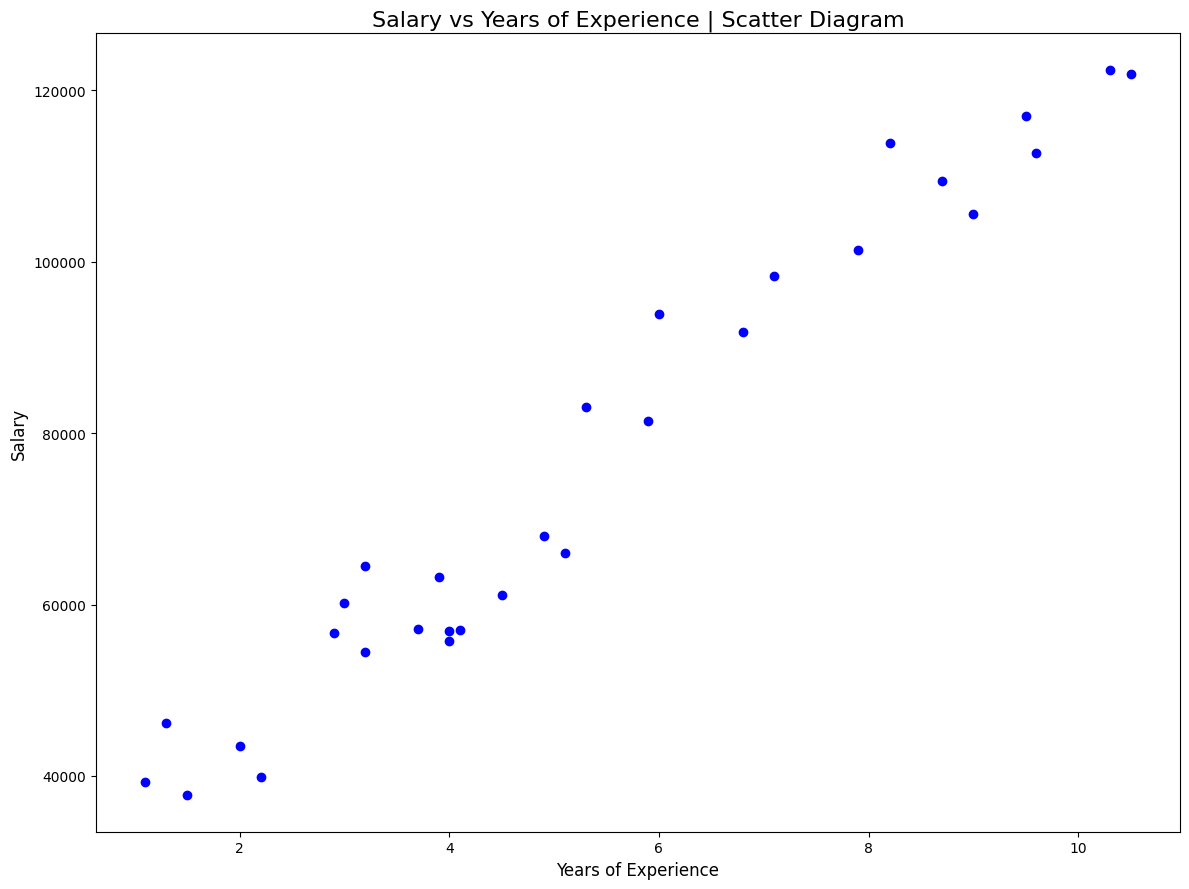

In [21]:
plt.figure(figsize=(12, 9))
plt.scatter(x=df['YearsExperience'], y=df['Salary'], color='blue', marker='o')
plt.title("Salary vs Years of Experience | Scatter Diagram", fontsize=16)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.tight_layout()
plt.show()

### Getting Feature and Target Variable

In [ ]:
X = df[['YearsExperience']] # Feature variable
y = df['Salary'] # target variable

In [8]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [9]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

### Splitting the dataset into training and testing data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model training on the training dataset

In [11]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Prediction using the test data

In [12]:
y_pred_lr = model_lr.predict(X_test)

### Comparing the Prediction made by linear regression against actual data

In [29]:
results_df = pd.DataFrame({"Actual Salary": y_test, "Predicted Salary": np.round(y_pred_lr)})
print(results_df)

    Actual Salary  Predicted Salary
27       112635.0          115790.0
15        67938.0           71498.0
23       113812.0          102597.0
17        83088.0           75268.0
8         64445.0           55478.0
9         57189.0           60190.0


### Model Evaluation

In [14]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error for Linear Regression: {np.round(mse_lr)}")

Mean Squared Error for Linear Regression: 49830097.0


In [15]:
r2_score_result = np.round(r2_score(y_test, y_pred_lr), 2)
print(r2_score_result)

0.9


### Finding Coefficient and Intercept for making a line

In [16]:
print(f"Slope(m) or coefficient: {np.round(model_lr.coef_[0], 0)}")

print(f"Intercept(c): {np.round(model_lr.intercept_)}")

Slope(m) or coefficient: 9424.0
Intercept(c): 25322.0


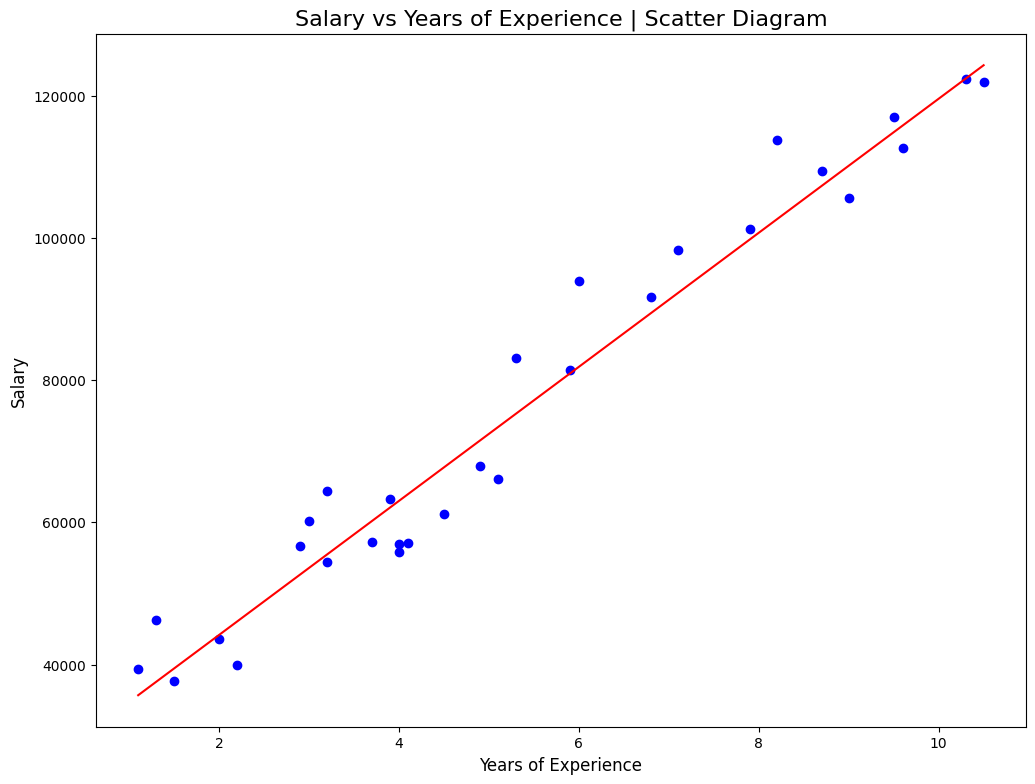

In [17]:
line = model_lr.coef_[0] * X + model_lr.intercept_

plt.figure(figsize=(12, 9))
plt.scatter(X, y, color='blue', )
plt.plot(X, line, color='red')
plt.title("Salary vs Years of Experience | Scatter Diagram", fontsize=16)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.show()

Sorting the dataframe

In [18]:
results_df = results_df.sort_values(by="Actual Salary").reset_index(drop=True)

Making a graph for visualizing the actual vs predicted salaries

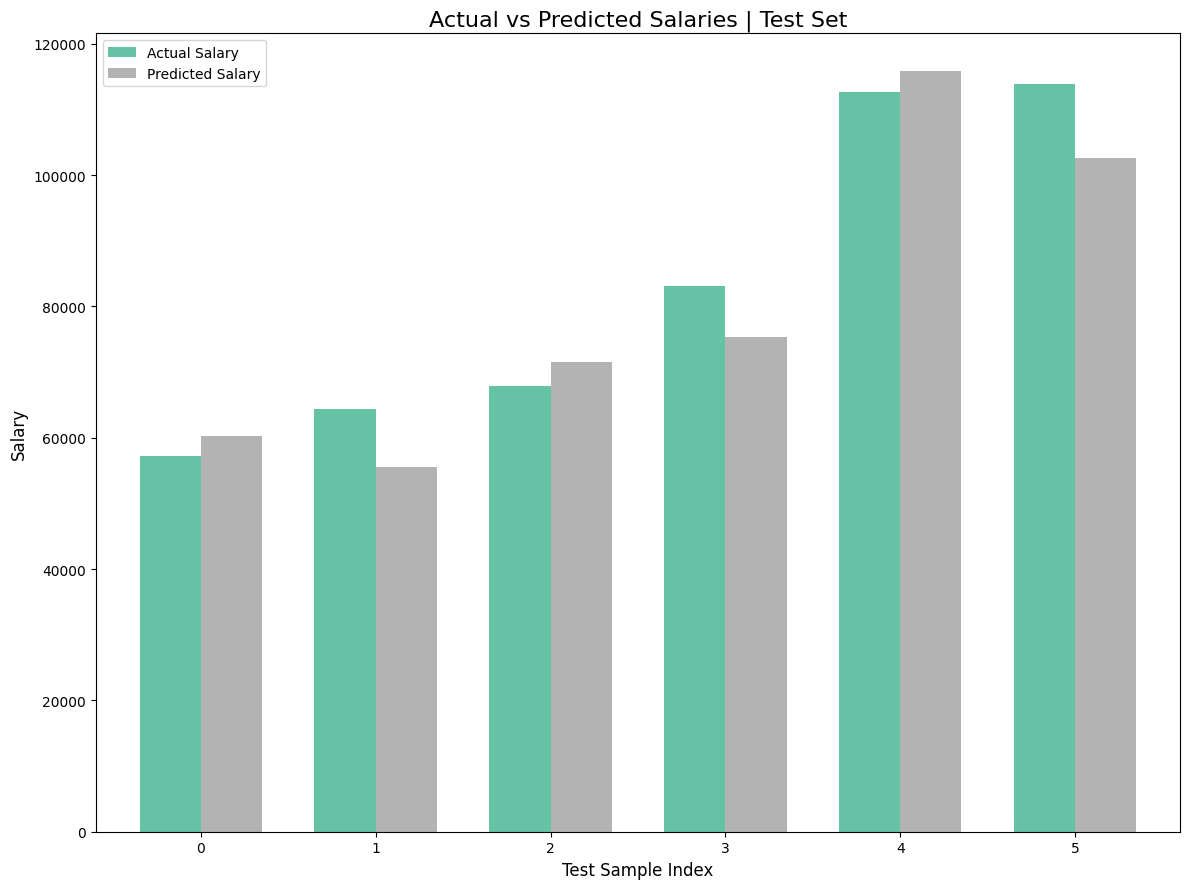

In [25]:
results_df.plot(kind='bar', figsize=(12, 9), width=0.7, colormap='Set2')
plt.title("Actual vs Predicted Salaries | Test Set", fontsize=16)
plt.xlabel("Test Sample Index", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

### Predicting the salary based on the user input

In [20]:
user_input_years = float(input("Enter years of experience to predict salary: "))

user_input_years_df = pd.DataFrame([[user_input_years]], columns=['YearsExperience'])

predicted_salary = model_lr.predict(user_input_years_df)

print(f"Predicted Salary for {user_input_years} years of experience: ${predicted_salary[0]:.2f}")

Predicted Salary for 66.0 years of experience: $647293.39
